Credit Card Fraud Detection

Approach:
- Apply PCA to decrease dimensions and easier visaulization
- Use Kmeans with Kmeans++ center init to try and cluster into 2 sets
- Check if Kmeans was effective  in sorting out fraud transactions

Preprocessing

- Normalize data to Standardize Scale
- We apply PCA to reduce to 2 dimensions

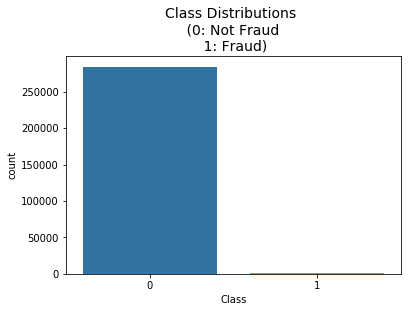

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

%matplotlib inline
zf = zipfile.ZipFile('./data/creditcardfraud.zip') 
data = pd.read_csv(zf.open('creditcard.csv'))

sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: Not Fraud \n 1: Fraud)', fontsize=14)
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time','Amount'], axis=1, inplace=True)
data.head()
no_label_df = data.drop('Class', axis=1)
label = data['Class']

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

no_label_df = StandardScaler().fit_transform(no_label_df)
model = PCA(n_components=2, random_state=42)
df = pd.DataFrame(model.fit_transform(no_label_df), columns=['pc1', 'pc2'])
df['labels'] = label

In [4]:
df_not_fraud = df.loc[df['labels']==0]
df_fraud = df.loc[df['labels']==1]

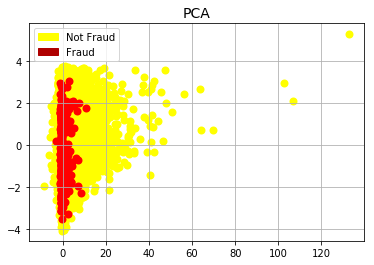

In [5]:
import matplotlib.patches as mpatches

yellow = mpatches.Patch(color='#FFFF00', label='Not Fraud')
red = mpatches.Patch(color='#AF0000', label='Fraud')

c1='yellow'
c2= 'red'

plt.scatter(df_not_fraud['pc1'], df_not_fraud['pc2'], c=c1, label='Not Fraud', linewidths=2)
plt.scatter(df_fraud['pc1'], df_fraud['pc2'], c=c2, label='Fraud', linewidths=2)
plt.title('PCA', fontsize=14)

plt.legend(handles=[yellow, red])
plt.grid(True)
plt.show()
# plt.legend(handles=[blue_patch, red_patch])

Model (from the plot of the labels, Gaussian Mixture Model seems to be good)
- Let us now apply Gaussian mixture model

The 2 principal Components will now be used as features for 
our Gaussian Mixture Model.
Gaussian Mixture Model seems to be a good model for this
since we can clearly fit the fraud detections in one big elipse
and since it only gives soft assignment, the other points will be correctly
assigned as well


Text(0.5,1,'Clustered Classes by our Gaussian mixture model')

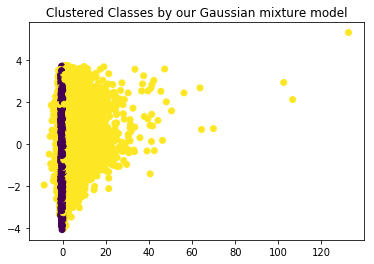

In [6]:
from sklearn.mixture import GMM
import warnings
warnings.filterwarnings('ignore')

no_label_df = df.drop('labels', axis=1)
gmm = GMM(n_components=2).fit(no_label_df)
labels = gmm.predict(no_label_df)
plt.scatter(no_label_df['pc1'], no_label_df['pc2'], c=labels, cmap='viridis')
plt.title('Clustered Classes by our Gaussian mixture model')

Evaluation
- Let us now put the graphs together

In [7]:
num_correct = sum(labels==df['labels'])
total = len(labels)
acc = (num_correct/total) * 100
print('Accuracy of our Model: {} %'.format(acc))

Accuracy of our Model: 83.61802905125225 %


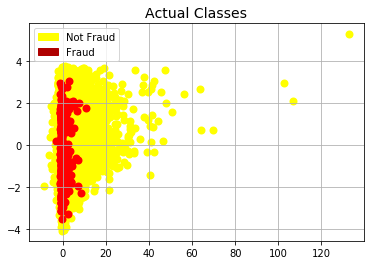

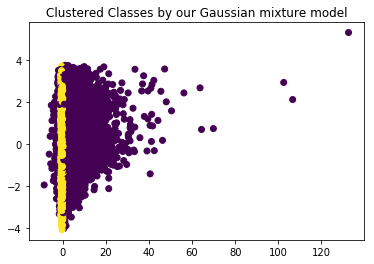

In [8]:
yellow = mpatches.Patch(color='#FFFF00', label='Not Fraud')
red = mpatches.Patch(color='#AF0000', label='Fraud')

c1='yellow'
c2= 'red'

plt.scatter(df_not_fraud['pc1'], df_not_fraud['pc2'], c=c1, label='Not Fraud', linewidths=2)
plt.scatter(df_fraud['pc1'], df_fraud['pc2'], c=c2, label='Fraud', linewidths=2)
plt.title('Actual Classes', fontsize=14)

plt.legend(handles=[yellow, red])
plt.grid(True)
plt.show()

no_label_df = df.drop('labels', axis=1)
gmm = GMM(n_components=2).fit(no_label_df)
labels = gmm.predict(no_label_df)
plt.scatter(no_label_df['pc1'], no_label_df['pc2'], c=labels, cmap='viridis')
plt.title('Clustered Classes by our Gaussian mixture model')
plt.show()